In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

df0 = df[:50] ## setosa
df1 = df[50:100] ## versicolor
df2 = df[100:] ## virginica


Comprimento da pétala x Tamanho da pétala (Setosa x Versicolor)


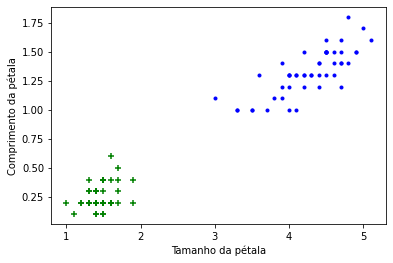

In [2]:
plt.xlabel('Tamanho da pétala')
plt.ylabel('Comprimento da pétala')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

Base de dados para treino e KNN

Text(42.0, 0.5, 'Truth')

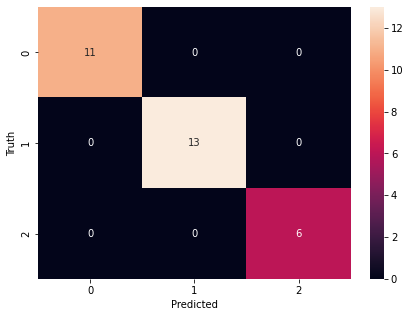

In [3]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

## Matriz de Confusão
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')